In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import plotly_express as px
import seaborn as sns

In [14]:
df_with_id = pd.read_csv("/Users/kunu/Desktop/ML Experiments/1. Dataset Download/Iris.csv")
df = df_with_id.drop('Id',axis=1)

In [ ]:
sns.pairplot(df,hue = 'Species')

In [16]:
px.scatter_3d(df, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm",color='Species')

In [17]:
X = df.iloc[:,:4]
y = df.iloc[:,-1]

In [18]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=0)

In [19]:
NB = GaussianNB()

y_pred = NB.fit(train_x,train_y).predict(test_x)

In [20]:
print(f"Accuracy score is: {metrics.accuracy_score(test_y,y_pred)*100}")
print(f"Precision score is: {metrics.precision_score(test_y,y_pred,average='weighted')*100}")
print(f"Recall score is: {metrics.recall_score(test_y,y_pred,average='weighted')*100}")

Accuracy score is: 96.66666666666667
Precision score is: 96.96969696969695
Recall score is: 96.66666666666667


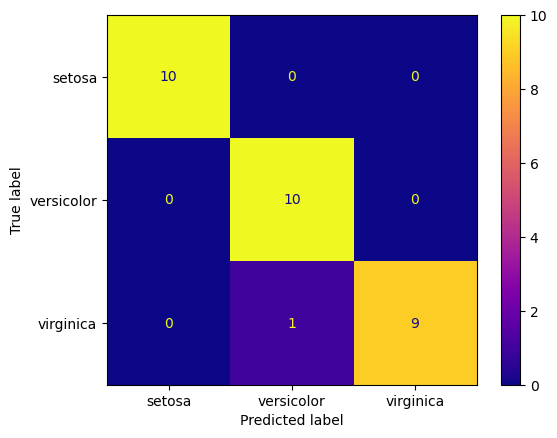

In [21]:
cm = metrics.confusion_matrix(test_y,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['setosa','versicolor','virginica'])
cm_display.plot(cmap='plasma')